In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [43]:
from sklearn.model_selection import train_test_split

In [57]:
df=pd.read_csv('../automobileEDA.csv')
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [45]:
df[['horsepower','price']]

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0
...,...,...
196,114.0,16845.0
197,160.0,19045.0
198,134.0,21485.0
199,106.0,22470.0


# creating model
- rule in scikit-learn
    - x values should be vector - 2d array
    - y values should be scaler - 1d array

In [46]:
x=df[['horsepower']]
y=df.price

In [47]:
xtrain,xtest, ytrain, ytest=train_test_split(x,y,test_size=.2)

In [48]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(160, 1) (160,)
(41, 1) (41,)


In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model=LinearRegression() # estimator

In [51]:
model.fit(xtrain,ytrain) # training step

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
model.score(xtest,ytest) *100

73.70985852955425

In [53]:
ypred=model.predict(xtrain)

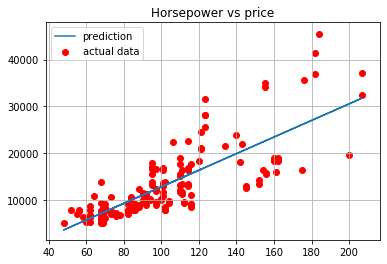

In [56]:
plt.plot(xtrain,ypred,label='prediction')
plt.scatter(xtrain,ytrain,label='actual data',c='red')
plt.legend()
plt.grid(True)
plt.title('Horsepower vs price')
plt.show()

# ENGINE SIZE

In [148]:
df[['engine-size','price']]

,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0
...,...,...
196,141,16845.0
197,141,19045.0
198,173,21485.0
199,145,22470.0


In [149]:
x = df[['engine-size']]
y = df.price

In [150]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.2)

In [151]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(160, 1) (160,)
(41, 1) (41,)


In [152]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
model.score(xtest, ytest)*100

76.85230145364517

In [154]:
ypred = model.predict(xtrain)

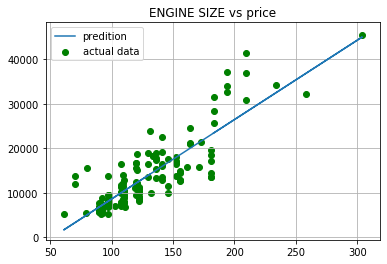

In [155]:
plt.plot(xtrain, ypred, label='predition')
plt.scatter(xtrain, ytrain,label='actual data',c='green')
plt.legend()
plt.grid(True)
plt.title('ENGINE SIZE vs price')
plt.show()

# Number of cylinders

In [156]:
df['num-of-cylinders'].unique()


array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [157]:
df['num-of-cylinders'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], [4,6,5,3,12,2,8],inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [158]:
df[['num-of-cylinders','price']]

,num-of-cylinders,price
0,4,13495.0
1,4,16500.0
2,6,16500.0
3,4,13950.0
4,5,17450.0
...,...,...
196,4,16845.0
197,4,19045.0
198,6,21485.0
199,6,22470.0


In [159]:
x = df[['num-of-cylinders']]
y = df.price

In [160]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.2)

In [161]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(160, 1) (160,)
(41, 1) (41,)


In [162]:
model = LinearRegression()

In [163]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
model.score(xtest, ytest) * 100

45.44737325841336

In [165]:
ypred = model.predict(xtrain)


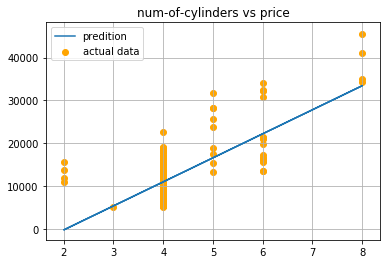

In [168]:
plt.plot(xtrain, ypred, label='predition')
plt.scatter(xtrain, ytrain,label='actual data',c='orange')
plt.legend()
plt.grid(True)
plt.title('num-of-cylinders vs price')
plt.show()

# Peak rpm

In [130]:
df[['peak-rpm','price']]

,peak-rpm,price
0,5000.0,13495.0
1,5000.0,16500.0
2,5000.0,16500.0
3,5500.0,13950.0
4,5500.0,17450.0
...,...,...
196,5400.0,16845.0
197,5300.0,19045.0
198,5500.0,21485.0
199,4800.0,22470.0


In [131]:
x = df[['peak-rpm']]
y = df.price

In [132]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.2)

In [133]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(160, 1) (160,)
(41, 1) (41,)


In [134]:
model = LinearRegression()

In [135]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
model.score(xtest, ytest) * 100

2.772969016003557

In [137]:
ypred = model.predict(xtrain)

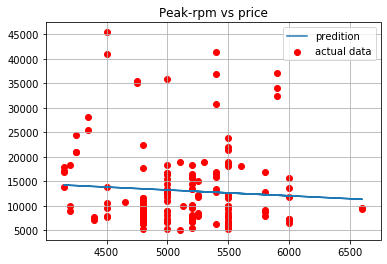

In [139]:
plt.plot(xtrain, ypred, label='predition')
plt.scatter(xtrain, ytrain,label='actual data',c='red')
plt.legend()
plt.grid(True)
plt.title('Peak-rpm vs price')
plt.show()